## Tuning ML models for Wine quality prediction

In this notebook we will be tuning the parameters for the KNN classifier to predict the quality of the white wine as it was the best scoring (F1-score) model.

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### Helper Functions

In [2]:
#Function to read data
def read_data(file_path):
    data = pd.read_csv(file_path, delimiter=';', header=0)
    data.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',\
                    'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
    #data.drop(['residual_sugar','free_sulfur_dioxide','sulphates'], axis=1, inplace=True)
    return data

#Function to remove duplicates
def remove_duplicates(data_frame):
    if data_frame.duplicated().sum()>0:
        data_frame.drop_duplicates(inplace=True)
        return data_frame
    else:
        return data_frame    

#Remove outliers
def remove_outliers(data_frame):
    stat_values = data_frame.quality.describe()
    IQR = stat_values['75%'] - stat_values['25%']
    higher = stat_values['75%'] + 1.5 * IQR
    lower = stat_values['25%'] - 1.5 * IQR
    data_frame = data_frame[data_frame['quality']> lower]
    data_frame = data_frame[data_frame['quality']< higher]
    return data_frame
 
# Encoding the data
def data_encoding(data_frame_column_to_encode, bins, labels):
    data_frame_column_to_encode = pd.cut(data_frame_column_to_encode, bins = bins, labels = labels)
    label_quality = preprocessing.LabelEncoder()
    data_frame_column_to_encode = label_quality.fit_transform(data_frame_column_to_encode)
    #print(data_frame_column_to_encode.value_counts())
    #sn.countplot(data_frame_column_to_encode)
    #plt.show()
    return data_frame_column_to_encode

# Splitting the data for train and test
def splitting_data(data_frame):
    X = data_frame.drop(data_frame.columns[-1], inplace = False, axis = 1)
    y = data_frame[data_frame.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

#Standardizing the data
def std_data(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    return X_train, X_test
    

#test performance of various models
def model_testing(models):
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'f1_weighted'
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return names, results

#visualize the performance of various models
def plot_model_results(model_names, performance_scores):
    # boxplot algorithm comparison
    fig = plt.figure(figsize = (14, 10))
    fig.suptitle('Model Performance Evaluation')
    ax = fig.add_subplot(111)
    plt.boxplot(performance_scores)
    ax.set_xticklabels(model_names)
    plt.show()
    
#Tuning the best model
def knn_param_selection(X, y, nfolds):
    param = {
        'n_neighbors': [3,5,10,20],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'metric': ['euclidean','manhattan', 'minkowski']
    }
    scoring = 'f1_weighted'
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid=param, scoring=scoring, cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_ 

SVC: 0.788345 (0.038491)
RandomForest: 0.805706 (0.031275)
DT: 0.777331 (0.021894)
KNN: 0.813694 (0.029482)
AdaBoost: 0.799841 (0.027158)
LogisticRegression: 0.793923 (0.032888)


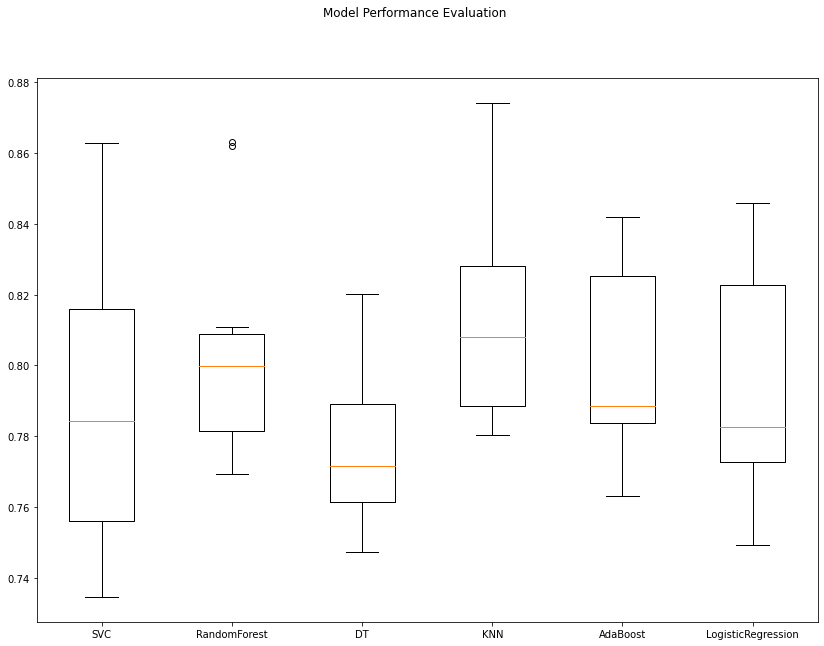

In [3]:
file_path = r"C:\data\winequality-white.csv"

#Load the dataset as a pandas dataframe
wine_data = read_data(file_path)

# Eliminate duplicate records
wine_data = remove_duplicates(wine_data)

# Remove the outliers
wine_data = remove_outliers(wine_data)

# Encoding the variable 'quality'
wine_data['quality'] = data_encoding(wine_data['quality'],(2,6,8), ['bad', 'good'] )

# Train-Test Split
X_train, X_test, y_train, y_test = splitting_data(wine_data)

#Scaling the data
X_train, X_test = std_data(X_train, X_test)

# Testing Various models
models = []
models.extend([('SVC', SVC()),('RandomForest', RandomForestClassifier()),('DT', DecisionTreeClassifier()),\
             ('KNN', KNeighborsClassifier()),('AdaBoost', AdaBoostClassifier()),('LogisticRegression',\
                                                                                 LogisticRegression())])
models,results = model_testing(models)

#Visualize performance
plot_model_results(models,results)

In [4]:
best_parameter_choice = knn_param_selection(X_train, y_train,10)

In [5]:
print("The best set of parameters for the KNN classifier are : "+ str(best_parameter_choice))

The best set of parameters for the KNN classifier are : {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3}


### Now that we have our best scoring model with the choice of best parameters we will proceed to learning a new model and making the predictions.

The continuation will be found in the notebook - 03_WineQualityPrediction.ipynb